In [1]:
import networkx as nx
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity, plot_heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=2.)

## Half Synchronization Test

### 1) Complete Graph

In [3]:
nxg = nx.complete_graph(10)
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(nxg.nodes()))
natfreqs

array([6.13607432, 6.13607432, 6.13607432, 6.13607432, 6.13607432,
       6.13607432, 6.13607432, 6.13607432, 6.13607432, 6.13607432])

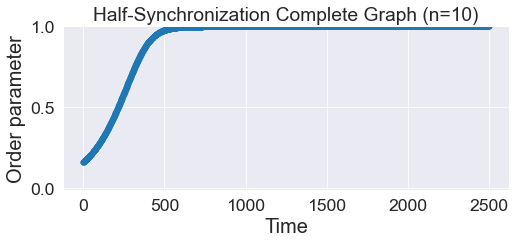

In [4]:
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=0.75, dt=0.01, T=25, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Complete Graph (n=10)');

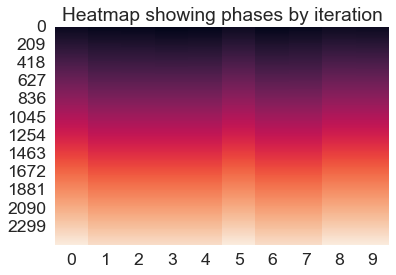

In [5]:
plot_heatmap(sim);

In [6]:
model.concentrated

True

### 2)  [Karate Club Graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)

In [34]:
nxg = nx.karate_club_graph()
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(nxg.nodes()))

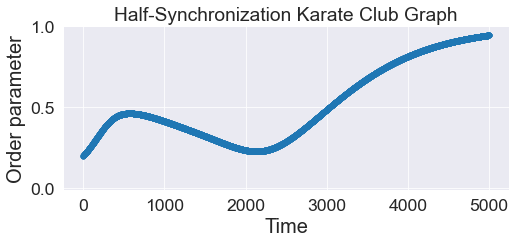

In [35]:
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=0.5, dt=0.01, T=50, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Karate Club Graph');

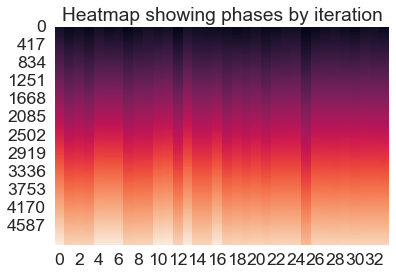

In [36]:
plot_heatmap(sim);

In [37]:
model.concentrated

True

### 3) Uniformly Random Tree

In [56]:
tree = nx.random_tree(n=25)
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(tree.nodes()))
print(nx.forest_str(tree, sources=[0]))

╙── 0
    ├── 4
    └── 19
        └── 17
            ├── 22
            │   ├── 11
            │   └── 18
            │       ├── 6
            │       └── 14
            │           └── 13
            │               └── 21
            │                   ├── 10
            │                   └── 23
            └── 16
                └── 1
                    └── 7
                        └── 12
                            ├── 8
                            ├── 9
                            │   └── 20
                            └── 15
                                └── 2
                                    ├── 3
                                    └── 5
                                        └── 24


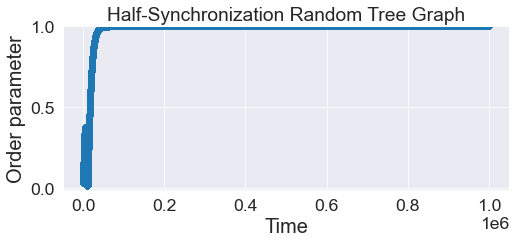

In [57]:
adj_mat = nx.to_numpy_array(tree)
model = Kuramoto(coupling=0.5, dt=0.01, T=10000, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Random Tree Graph');

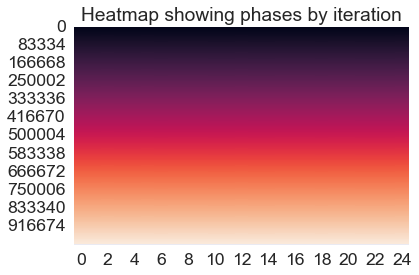

In [58]:
plot_heatmap(sim);

In [59]:
model.concentrated

True

In [72]:
headers = []
for i in range(1, 26):
    for j in range(1, 251):
        headers.append(f's{i}_{j}')
len(headers)

6250

In [73]:
25*250

6250

In [74]:
df = pd.DataFrame(sim[:,:250].flatten(order='C')).T
df

,0,1,2,3,4,5,6,7,8,9,...,6240,6241,6242,6243,6244,6245,6246,6247,6248,6249
0,4.293243,4.32546,4.357676,4.389893,4.422109,4.454324,4.486539,4.518753,4.550967,4.583179,...,10.876618,10.912891,10.949171,10.985457,11.02175,11.058049,11.094354,11.130665,11.166982,11.203305


In [75]:
df = pd.DataFrame(df.values, columns = headers)
df

,s1_1,s1_2,s1_3,s1_4,s1_5,s1_6,s1_7,s1_8,s1_9,s1_10,...,s25_241,s25_242,s25_243,s25_244,s25_245,s25_246,s25_247,s25_248,s25_249,s25_250
0,4.293243,4.32546,4.357676,4.389893,4.422109,4.454324,4.486539,4.518753,4.550967,4.583179,...,10.876618,10.912891,10.949171,10.985457,11.02175,11.058049,11.094354,11.130665,11.166982,11.203305


In [55]:
df

,s1_1,s1_2,s1_3,s1_4,s1_5,s1_6,s1_7,s1_8,s1_9,s1_10,...,s25_241,s25_242,s25_243,s25_244,s25_245,s25_246,s25_247,s25_248,s25_249,s25_250
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
